In [12]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
titles = pd.read_csv('C:/Users/Pc/OneDrive/Pictures/Data science assignments/week 10/batch88assignmentsanddatasets/titles.csv')  ##### Will be available on Github  - https://github.com/DataScience75/Top_mentor_projects_Datasets/blob/main/titles.csv
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.read_csv('C:/Users/Pc/OneDrive/Pictures/Data science assignments/week 10/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [5]:
titles_df = titles.copy()
cast_df = cast.copy()

In [6]:
title_counts = titles_df['title'].value_counts()

sorted_titles = title_counts.sort_values(ascending=False)

top_10_common_titles = sorted_titles.head(10)
print("These are the top 10 most common movie names of all time:\n", top_10_common_titles)


These are the top 10 most common movie names of all time:
 Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Temptation              11
The Three Musketeers    11
Othello                 11
Kismet                  11
Maya                    11
Freedom                 11
Name: title, dtype: int64


### Which three years of the 1930s saw the most films released?

In [10]:
movies_1930s = titles_df[(titles_df['year'] >= 1930) & (titles_df['year'] <= 1939)]

film_counts_by_year = movies_1930s.groupby('year').size()

top_3_years = film_counts_by_year.nlargest(3)

In [11]:
print(top_3_years)

year
1937    1194
1936    1139
1938    1127
dtype: int64


### Plot the number of films that have been released each decade over the history of cinema.

In [14]:
titles_df['decade'] = (titles_df['year'] // 10) * 10

films_per_decade = titles_df.groupby('decade').size().reset_index(name='film_count')

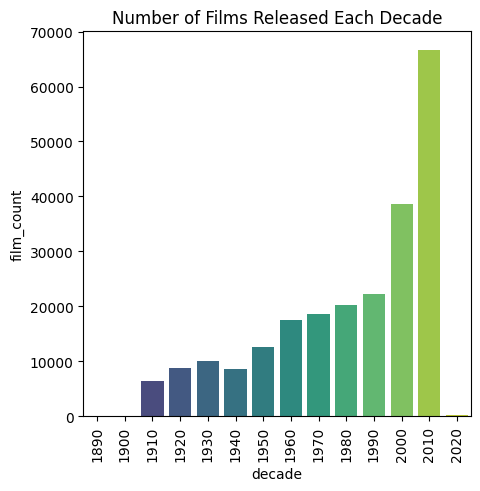

In [87]:
plt.figure(figsize=(5, 5))
sns.barplot(x='decade', y='film_count', data=films_per_decade, palette='viridis')
plt.title('Number of Films Released Each Decade')
plt.xticks(rotation=90)
plt.show()

### Plot the number of "Hamlet" films made each decade.

In [26]:
titles_df['decade'] = (titles_df['year'] // 10) * 10

hamlet_films = titles_df[titles_df['title'] == 'Hamlet']

hamlet_films_per_decade = hamlet_films.groupby('decade').size().reset_index(name='hamlet_count')

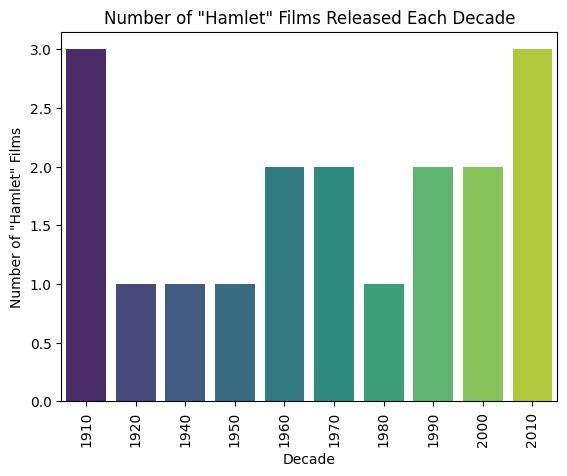

In [86]:
sns.barplot(x='decade', y='hamlet_count', data=hamlet_films_per_decade, palette='viridis')
plt.title('Number of "Hamlet" Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

plt.show()


### Plot the number of "Rustler" characters in each decade of the history of film.

In [33]:
cast_df['decade'] = (cast_df['year'] // 10) * 10

rustler_characters = cast_df[cast_df['character'] == 'Rustler']

rustler_characters_per_decade = rustler_characters.groupby('decade').size().reset_index(name='rustler_count')

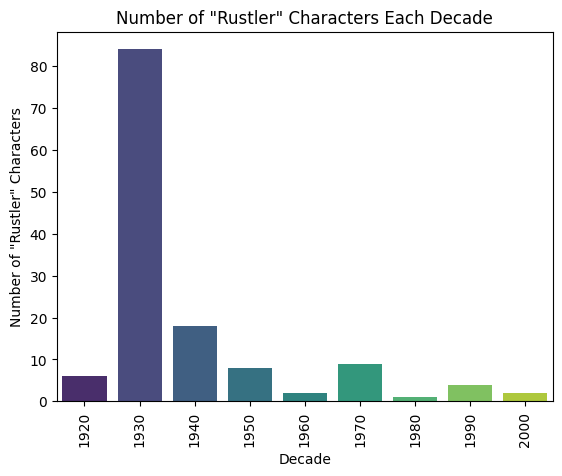

In [35]:
sns.barplot(x='decade', y='rustler_count', data=rustler_characters_per_decade, palette='viridis')
plt.title('Number of "Rustler" Characters Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of "Rustler" Characters')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

plt.show()


### Plot the number of "Hamlet" characters each decade.

In [36]:
cast_df['decade'] = (cast_df['year'] // 10) * 10

hamlet_characters = cast_df[cast_df['character'] == 'Hamlet']

hamlet_characters_per_decade = hamlet_characters.groupby('decade').size().reset_index(name='hamlet_count')


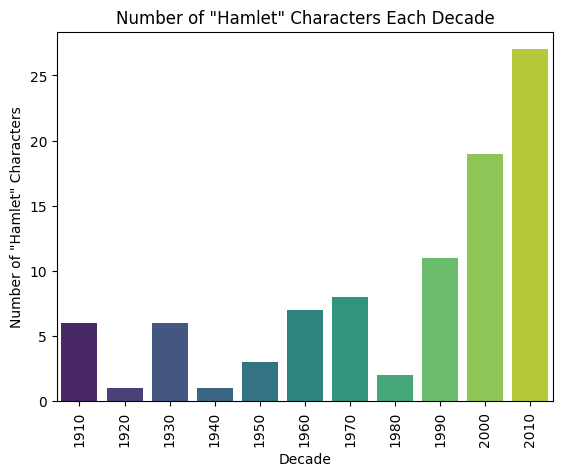

In [37]:
sns.barplot(x='decade', y='hamlet_count', data=hamlet_characters_per_decade, palette='viridis')
plt.title('Number of "Hamlet" Characters Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Characters')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

plt.show()

### What are the 11 most common character names in movie history?

In [39]:
character_counts = cast_df['character'].value_counts().reset_index(name='count')

top_11_characters = character_counts.head(11)

In [42]:
top_11_characters

,index,count
0,Himself,19486
1,Dancer,11995
2,Extra,10887
3,Reporter,8127
4,Doctor,7402
5,Student,7146
6,Policeman,6855
7,Party Guest,6718
8,Nurse,6637
9,Bartender,6583


### Who are the 10 people most often credited as "Herself" in film history?

In [44]:
herself_credits = cast_df[cast_df['character'] == 'Herself']

herself_counts = herself_credits['name'].value_counts().reset_index(name='count')

top_10_herself_credits = herself_counts.head(10)

In [45]:
top_10_herself_credits

,index,count
0,Queen Elizabeth II,11
1,Joyce Brothers,9
2,Margaret Thatcher,7
3,Mary Jo Pehl,7
4,Hillary Clinton,6
5,Joan Rivers,6
6,Rekha,5
7,Marilyn Monroe,5
8,Bunny Yeager,5
9,Caroline Rhea,5


### Who are the 10 people most often credited as "Himself" in film history?

In [46]:
himself_credits = cast_df[cast_df['character'] == 'Himself']

himself_counts = himself_credits['name'].value_counts().reset_index(name='count')

top_10_himself_credits = himself_counts.head(10)

In [47]:
top_10_himself_credits

,index,count
0,Adolf Hitler,99
1,Richard Nixon,45
2,Ronald Reagan,39
3,John F. Kennedy,33
4,Winston Churchill,23
5,Ron Jeremy,23
6,George W. Bush,23
7,Benito Mussolini,22
8,Franklin D. Roosevelt,20
9,Bill Clinton,20


### Which actors or actresses appeared in the most movies in the year 1945?

In [48]:
movies_1945 = cast_df[cast_df['year'] == 1945]

top_actors_1945 = movies_1945['name'].value_counts().reset_index(name='movie_count')

In [50]:
top_10_actors_1945 = top_actors_1945.head(10)
top_10_actors_1945

,index,movie_count
0,Emmett Vogan,39
1,Sam (II) Harris,32
2,Bess Flowers,29
3,Harold Miller,29
4,Nolan Leary,27
5,Frank O'Connor,27
6,Franklyn Farnum,26
7,Larry Steers,25
8,Herman Hack,24
9,Edmund Cobb,24


### Which actors or actresses appeared in the most movies in the year 1985?

In [52]:
movies_1985 = cast_df[cast_df['year'] == 1985]

top_actors_1985 = movies_1985['name'].value_counts().reset_index(name='movie_count')

top_10_actors_1985 = top_actors_1985.head(10)

In [53]:
top_10_actors_1985

,index,movie_count
0,Shakti Kapoor,21
1,Mammootty,21
2,Sukumari,19
3,Raj Babbar,15
4,Mohanlal,15
5,Aruna Irani,15
6,Lou Scheimer,15
7,Deven Verma,13
8,Asrani,13
9,Rajesh Khanna,13


### Plot how many roles Mammootty has played in each year of his career.

In [54]:
mammootty_roles = cast_df[cast_df['name'] == 'Mammootty']

mammootty_roles_by_year = mammootty_roles.groupby('year').size().reset_index(name='role_count')

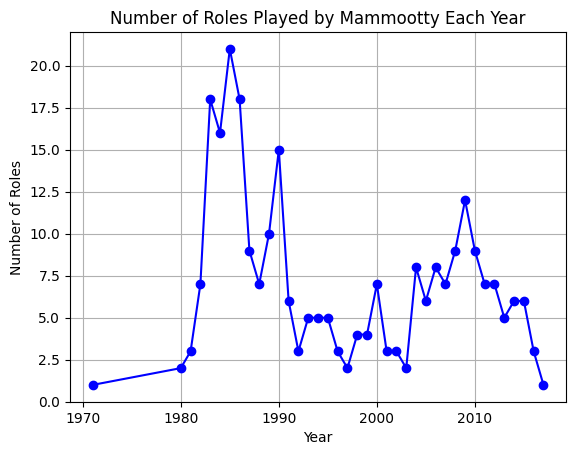

In [56]:
plt.plot(mammootty_roles_by_year['year'], mammootty_roles_by_year['role_count'], marker='o', linestyle='-', color='b')
plt.title('Number of Roles Played by Mammootty Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.grid(True)
plt.show()


### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [57]:
patron_in_roles = cast_df[cast_df['character'].str.startswith("Patron in")]

top_patron_in_roles = patron_in_roles['character'].value_counts().reset_index(name='count')

top_10_patron_in_roles = top_patron_in_roles.head(10)

In [58]:
top_10_patron_in_roles

,index,count
0,Patron in Frisky Rabbit,16
1,Patron in Chinese Restaurant,9
2,Patron in the Coffee House,9
3,Patron in Billiard Parlor,5
4,Patron in Bar,4
5,Patron in restaurant,4
6,Patron in cabaret,3
7,Patron in Restaurant,3
8,Patron in Club,3
9,Patron in Quiet Bar,2


### What are the 10 most frequent roles that start with the word "Science"?

In [59]:
science_roles = cast_df[cast_df['character'].str.startswith("Science")]

top_science_roles = science_roles['character'].value_counts().reset_index(name='count')

In [61]:
top_10_science_roles = top_science_roles.head(10)
top_10_science_roles

,index,count
0,Science Teacher,60
1,Science Student,9
2,Science Fair Student,9
3,Science Fair Judge,6
4,Science Kid,6
5,Science Club Member,5
6,Science Promo Cadet,5
7,Science Reporter,5
8,Science,4
9,Science Officer,3


### Plot the n-values of the roles that Judi Dench has played over her career.

In [69]:
c = cast
c = c[c.name == 'Judi Dench']

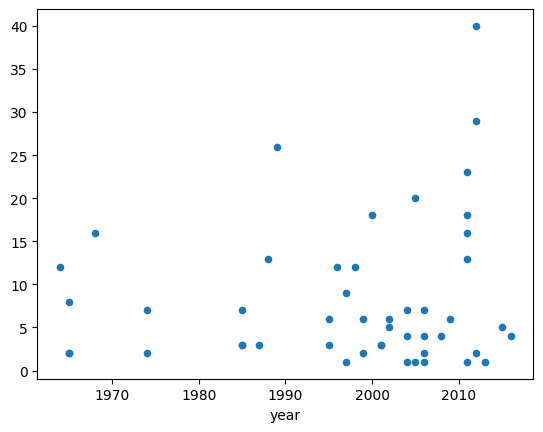

In [75]:
c.plot(x='year', y='n', kind='scatter')
plt.ylabel(None)
plt.show()

### Plot the n-values of Cary Grant's roles through his career.

In [76]:
c = cast
c = c[c.name == 'Cary Grant'].sort_values('year')
c = c[c.n.notnull()]

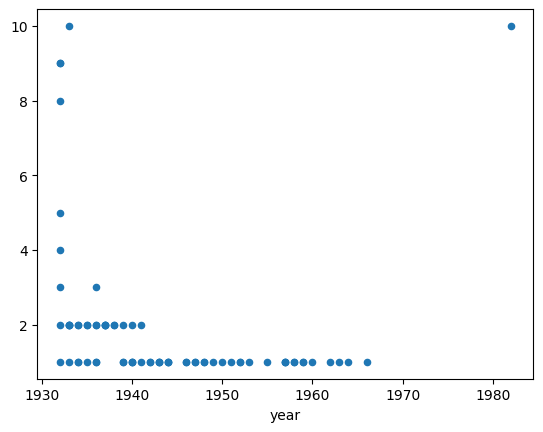

In [78]:
c.plot(x='year', y='n', kind='scatter')
plt.ylabel(None)
plt.show()

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [79]:
c = cast
c = c[c.name == 'Sidney Poitier'].sort_values('year')
c = c[c.n.notnull()]

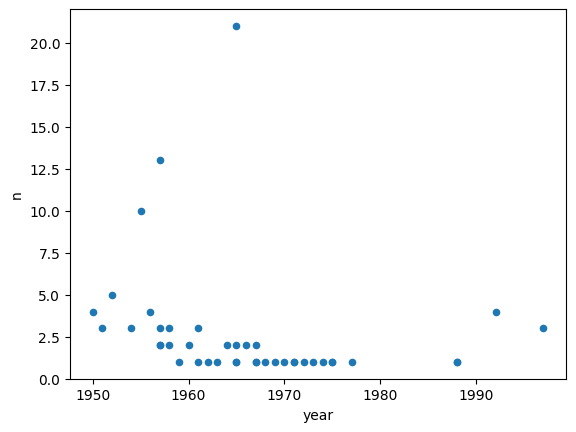

In [81]:
c.plot(x='year', y='n', kind='scatter')
plt.show()

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [82]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]

In [83]:
c.type.value_counts()

actor      6599
actress    2953
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [84]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]

In [85]:
c.type.value_counts()

actor      4550
actress    4544
Name: type, dtype: int64